# Treating Depression: A Randomized Clinical Trial

Clinical depression is a recurrent illness requiring treatment and often hospitalization. Nearly 50% of people who have an episode of major depression will have a recurrence within 2-3 years. Being able to prevent the recurrence of depression in people who are at risk for the disease would go a long way to alleviate the pain and suffering of patients and would also save society many thousands of dollars in medical expenses and lost wages due to an inability to work.

During the 1980's the federal government, through the National Institutes of Health (NIH), sponsored a multi-centered, randomized, controlled, clinical trial to evaluate two drugs to prevent the recurrence of depression in patients who have had at least one previous episode of the illness (Prien et al., Archives of General Psychiatry, 1984). 

The study was multi-centered. There were 5 medical clinics in major metropolitan areas across the country that participated in this trial. Using many clinics enabled the investigators to enroll many more patients into the study and allowed for more diversity in the patients who participated. There were 3 treatment groups. Patients received either Imipramine (Imip), Lithium (Li), or a Placebo (Pl) where Imip and Li are active drugs. Patients were randomly assigned to one of the 3 treatment groups. Like most other medical studies where new, unexplored treatments are evaluated, patients chose themselves to participate in the study by signing a consent form. Patients were followed for 2-4 years to see whether or not they had a recurrence of depression. If they did not have a recurrence within this time frame, then their treatment was considered a Success. If they did have a recurrence, it was considered a Failure. The study was double-blinded. A number of additional background variables were measured for each patient.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [2]:
data = pd.read_excel('depression.xls')
data.head()

,Hospt,Treat,Outcome,Time,AcuteT,Age,Gender
0,1,0,1,36.143002,211,33,1
1,1,1,0,105.142998,176,49,1
2,1,1,0,74.570999,191,50,1
3,1,0,1,49.714001,206,29,2
4,1,0,0,14.429000,63,29,1


**Hospt** Which hospital the patient was from: Labeled 1, 2, 3, 5 or 6

**Treat** 0=Lithium; 1=Imipramine; 2=Placebo

**Outcome** 0=Success 1=Failure (recurrence of depression)

**Time** Number of weeks until a recurrence (if outcome=1) or until study ended (if outcome=0)

**AcuteT** How long the patient was depressed before the start of the current study, measured in days

**Age** Age in years

**Gender** 1=Female 2=Male

In [3]:
data.dtypes

Hospt        int64
Treat        int64
Outcome      int64
Time       float64
AcuteT       int64
Age          int64
Gender       int64
dtype: object

## Out of the first 10 patients, how many patients had a recurrence during the study?

In [16]:
data.Outcome[:10].sum()

5

Out of the first 10 patients in the dataset, 5 had a recurrence.

## Out of the first ten individuals in the datafile who were assigned to the Lithium treatment group, how many had a recurrence of depression during the study?

In [24]:
first_ten_lithium = data.loc[data.Treat == 0][:10]
first_ten_lithium.loc[first_ten_lithium.Outcome == 1]

,Hospt,Treat,Outcome,Time,AcuteT,Age,Gender
0,1,0,1,36.143002,211,33,1
3,1,0,1,49.714001,206,29,2
15,1,0,1,5.571000,227,46,1
18,2,0,1,1.286000,173,54,1
22,2,0,1,4.000000,148,50,1


Out of the first 10 patients assigned the drug Lithium in the dataset, 5 had a recurrence of depression.

## How many days was the first male in the datafile depressed before the start of the study?

In [28]:
data[data.Gender == 2].iloc[0].AcuteT

206.0

The first male in the dataset was depressed for 206 days before the start of the study

## Was the randomization effective in assigning an approximately equal number of patients to each treatment group?

In [39]:
data.Treat.value_counts()

1    38
0    37
2    34
Name: Treat, dtype: int64

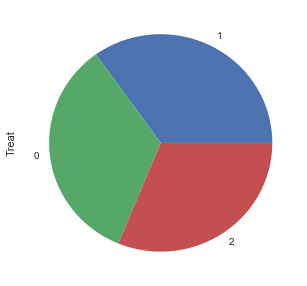

In [41]:
data.Treat.value_counts().plot.pie(figsize=(5, 5))

The randomization did assigned a roughly equal number of individuals to each treatment group:

- Lithium: 37
- Imipramine: 38
- Placebo: 34

## Was the randomization successful in balancing other variables such as AcuteT?

In [64]:
comparison = pd.DataFrame({'Lithium': data[data.Treat == 0].AcuteT,
                           'Imipramine': data[data.Treat == 1].AcuteT,
                           'Placebo': data[data.Treat == 2].AcuteT})
comparison.describe()

,Imipramine,Lithium,Placebo
count,38.000000,37.000000,34.000000
mean,183.657895,172.621622,202.117647
std,82.353974,80.291950,102.908540
min,47.000000,48.000000,70.000000
25%,132.750000,114.000000,140.000000
50%,166.500000,173.000000,163.500000
75%,211.250000,211.000000,244.000000
max,428.000000,441.000000,512.000000


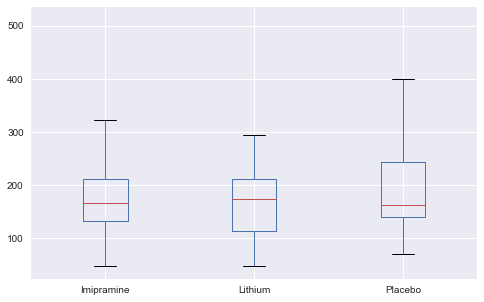

In [76]:
comparison.plot.box(figsize=(8, 5), showfliers=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11bddf6a0>,
      dtype=object)

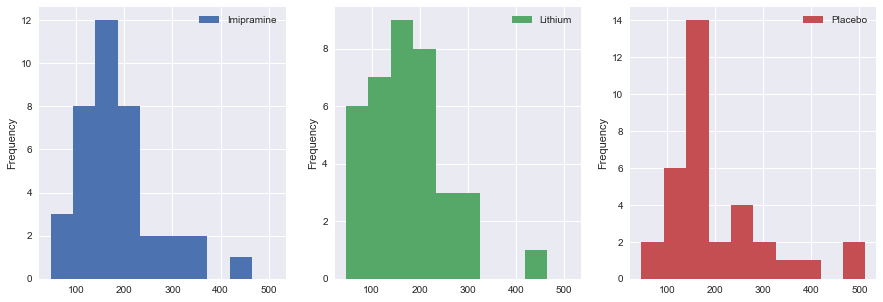

In [70]:
comparison.plot.hist(subplots=True, layout=(1, 3), figsize=(15, 5))

The variable that represents the period the patient was depressed before the start of the study is moderately balanced, imipramine with median of 166.5, lithium 173 and placebo 163.5, is worth noting that placebo have the highest range.

## Which of the drugs (if either) was more successful in preventing the recurrence of depression relative to the placebo?

In [121]:
outcome = data.loc[:, ['Treat', 'Outcome']]
outcome['Outcome'] = outcome.Outcome.replace({0: 'success', 1: 'fail'})
lithium = outcome.loc[outcome.Treat == 0].Outcome
imipramine = outcome.loc[outcome.Treat == 1].Outcome
placebo = outcome.loc[outcome.Treat == 2].Outcome

In [126]:
two_way_table = pd.DataFrame({'lithium': lithium.value_counts(),
                              'imipramine': imipramine.value_counts(),
                              'placebo': placebo.value_counts()}).transpose()

In [132]:
two_way_table['total'] = two_way_table.sum(axis=1)

,fail,success,total
imipramine,11,27,38
lithium,23,14,37
placebo,23,11,34


In [139]:
conditional_percentages = two_way_table.apply(lambda x: x/x.total, axis=1)
conditional_percentages

,fail,success,total
imipramine,0.289474,0.710526,1.0
lithium,0.621622,0.378378,1.0
placebo,0.676471,0.323529,1.0


The results show that Imipramine has the higest success rate, with 71% of the patients not having a recurrence. Lithium and placebo had similar results, with 38% of success rate for lithium and 32% for placebo.

The experiment showed that the most effective drug is Imipramine. Lithium had similar results as the placebo, so its use is questionable.

Having this information doctors can prescribe imipramine for patients suffering from clinical depression, and governments can put forward incentives to make the drug more accessible.

## Which of the drugs (if either) delayed the recurrence of depression longer relative to the placebo?

In [171]:
delay = data.loc[:, ['Treat', 'Time']]
li = delay.loc[delay.Treat == 0].Time.reset_index(drop=True)
im = delay.loc[delay.Treat == 1].Time.reset_index(drop=True)
pl = delay.loc[delay.Treat == 2].Time.reset_index(drop=True)

In [176]:
comparison = pd.DataFrame({'lithium': li, 'imipramine': im, 'placebo': pl})
comparison.describe()

,imipramine,lithium,placebo
count,38.000000,37.000000,34.000000
mean,63.063868,37.725919,37.584059
std,49.485291,40.822979,40.265052
min,0.571000,0.286000,0.000000
25%,23.000000,5.286000,5.392750
50%,70.714001,22.000000,17.785999
75%,101.500000,67.000000,61.714001
max,206.000000,165.000000,131.000000


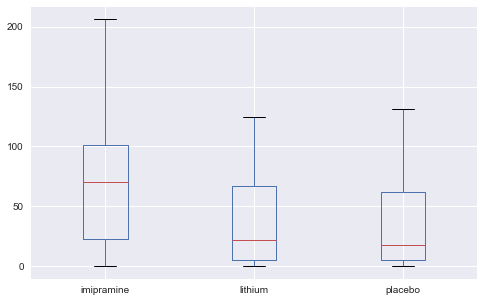

In [180]:
comparison.plot.box(figsize=(8, 5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11cdca438>,
      dtype=object)

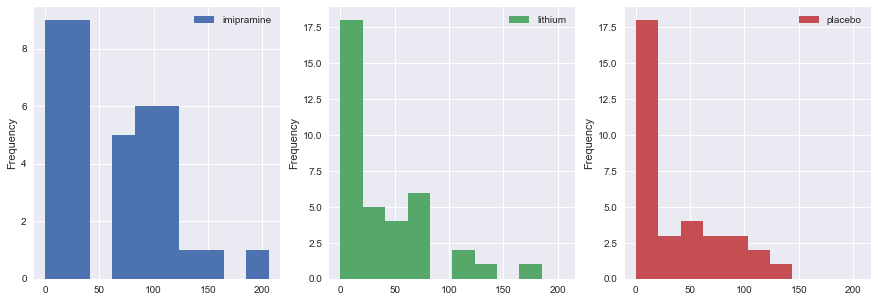

In [182]:
comparison.plot.hist(subplots=True, layout=(1, 3), figsize=(15, 5))

Imipramine is the most effective in delaying reccurrence, as median shows 70.7 for imipramine vs 22 and 17.8 for lithium and placebo respectively. Imipramine median is above lithium and placebo Q3 measure, 67 and 61.7 for lithium and placebo respectively, which clearly shows its advantage.

The large spread of imipramine shows that is not guaranteed to cure depression, some individuals that took imipramine had a fast recurrence, but compared to lithium is still more effective.

## Summary

From the study is possible to conclude that overall Imipramine is more effective than Lithium in delaying and preventing depression recurrence, the population for which this study can be generalized is sufferers of clinical depression.